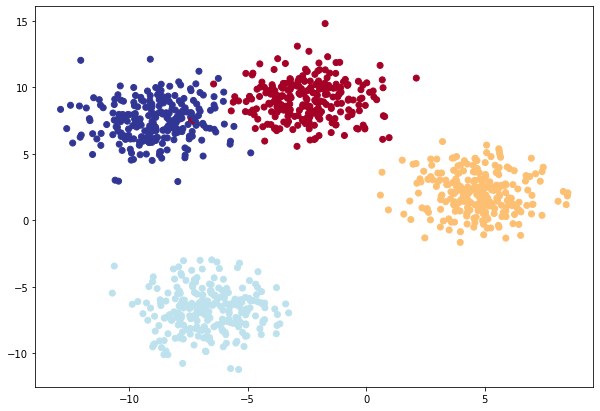

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import torch
from torch import nn


#set the hyperparameters for data creation

NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

#data
x_blobs,y_blobs= make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

#turn data to tensors
x_blob = torch.from_numpy(x_blobs).type(torch.float)
y_blob= torch.from_numpy(y_blobs).type(torch.LongTensor)

x_train, x_test, y_train,y_test=train_test_split(x_blob,y_blob, test_size=0.2, random_state=RANDOM_SEED)

#visulize
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [2]:
#build model

#device
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
from torch import nn

class BlobMultiModel_0(nn.Module):
  def __init__( self, input_features,output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),

        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

In [4]:
model_1=BlobMultiModel_0(input_features=2,
                         output_features=4,
                         hidden_units=8).to(device)
model_1

BlobMultiModel_0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [5]:
torch.unique(y_train)

tensor([0, 1, 2, 3])

In [6]:
from torch.nn.modules.loss import CrossEntropyLoss
#loss and optimizer

loss_fn=CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)


In [7]:
###device
x_train,y_train=x_train.to(device), y_train.to(device)
x_test,y_test=x_test.to(device), y_test.to(device)

In [8]:
def accuracy_fn(y_true,y_pred):
  correct =torch.eq(y_true,y_pred).sum().item()
  acc =(correct/len(y_pred))
  return acc

In [9]:
#train and test
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

for epoch in range(epochs):
  model_1.train()

  train_logits=model_1(x_train)
  y_pred=torch.softmax(train_logits, dim=1).argmax(dim=1)

  loss=loss_fn(train_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ##test
  model_1.eval()
  with torch.inference_mode():
    logits=model_1(x_test)
    test_pred=torch.softmax(logits, dim=1).argmax(dim=1)

    loss_test=loss_fn(logits,y_test)
    acc_test=accuracy_fn(y_true=y_test,y_pred=test_pred)

  
  
  if epoch % 100 == 0:
    print(f"epoch:{epoch} | loss: {loss:.5f} , acc: {acc:.2f} % | test loss:{loss_test:.5f} ,test acc: {acc_test:.2f} %")



epoch:0 | loss: 1.35031 , acc: 0.30 % | test loss:1.01169 ,test acc: 0.48 %
epoch:100 | loss: 0.03053 , acc: 0.99 % | test loss:0.02034 ,test acc: 0.99 %
epoch:200 | loss: 0.02469 , acc: 0.99 % | test loss:0.01473 ,test acc: 0.99 %
epoch:300 | loss: 0.02270 , acc: 0.99 % | test loss:0.01280 ,test acc: 0.99 %
epoch:400 | loss: 0.02175 , acc: 0.99 % | test loss:0.01171 ,test acc: 0.99 %
epoch:500 | loss: 0.02117 , acc: 0.99 % | test loss:0.01104 ,test acc: 0.99 %
epoch:600 | loss: 0.02077 , acc: 0.99 % | test loss:0.01052 ,test acc: 0.99 %
epoch:700 | loss: 0.02046 , acc: 0.99 % | test loss:0.01012 ,test acc: 0.99 %
epoch:800 | loss: 0.02022 , acc: 0.99 % | test loss:0.00976 ,test acc: 0.99 %
epoch:900 | loss: 0.02001 , acc: 0.99 % | test loss:0.00947 ,test acc: 0.99 %


In [10]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("it already exists")
else:
  print("downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)



downloading


In [11]:
from helper_functions import  plot_predictions, plot_decision_boundary

In [12]:
model_1.eval()
with torch.inference_mode():
  y_logits=model_1(x_test)

y_logits[:10]

tensor([[-1.2518, 10.8426, -5.3073, -7.4122],
        [ 4.0677, -5.7125, -3.2550,  9.5264],
        [-3.5538, -0.8245, 11.0870, -0.5092],
        [-1.3823,  7.6483, -3.2016, -4.8464],
        [ 9.0342, -1.5955, -6.6337, -5.1970],
        [ 4.5413, -6.8184, -3.6584, 11.6368],
        [-3.2456, -0.6373,  9.9587, -0.4882],
        [ 9.3645, -3.9820, -5.6174, -2.6392],
        [-4.9044, -0.8874, 13.3144,  0.2970],
        [ 9.2650, -3.3548, -5.7954, -3.6056]], device='cuda:0')

In [13]:
y_pred_probs=torch.softmax(y_logits,dim=1).argmax(dim=1)
y_pred_probs[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

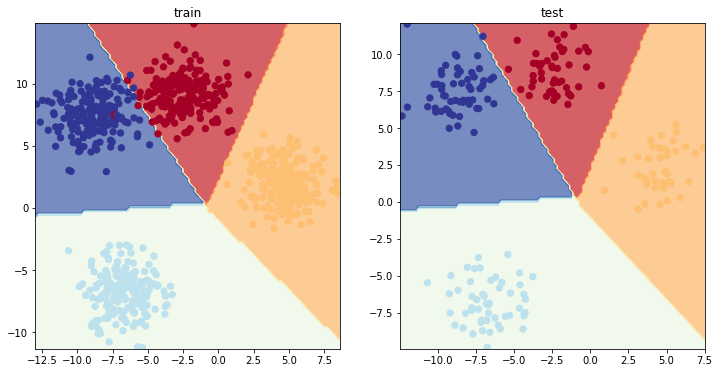

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_1,x_train,y_train)

plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_1,x_test,y_test)

In [15]:
!pip install torchmetrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 30.5 MB/s eta 0:00:00


In [19]:
from torchmetrics import Accuracy

In [24]:
metrics_accuracy=Accuracy(task="multiclass",num_classes=4).to(device)

metrics_accuracy(y_pred_probs,y_test)

tensor(0.9950, device='cuda:0')